In [673]:
#carga de librerias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.special as special 
from scipy.optimize import curve_fit
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [674]:
#cargar archivo csv desde seaborn 
df=pd.read_csv('Mexico_limpio.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head(20)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/35797,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,Dici,2010-06-28,a few days or more,0%,f,...,5.00,5.00,5.00,4.80,4.70,1.0,1.0,0.0,0.0,1.70
1,https://www.airbnb.com/rooms/44616,Condesa Haus,A new concept of hosting in mexico through a b...,No se proporcionan detalles,https://a0.muscache.com/pictures/251410/ec75fe...,Fernando,2010-08-09,within an hour,100%,t,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,https://www.airbnb.com/rooms/67703,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",No se proporcionan detalles,https://a0.muscache.com/pictures/3281720/6f078...,Nicholas,2011-01-04,within an hour,71%,t,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/70644,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,Trisha,2010-08-24,within a few hours,100%,t,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,https://www.airbnb.com/rooms/107078,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,Andrea,2011-04-27,within an hour,100%,t,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11
5,https://www.airbnb.com/rooms/131610,MARIA DEL ALMA,No se proporciona descripción,No se proporcionan detalles,https://a0.muscache.com/pictures/837085/b9ed71...,Fernando,2011-05-31,Desconocido,-%,f,...,5.00,5.00,5.00,4.80,4.70,3.0,1.0,2.0,0.0,1.70
6,https://www.airbnb.com/rooms/165772,BEST 5 Bedroom HOUSE IN S. Miguel Chapultepec,Welcome to Your Home in Mexico City<br />We ha...,San Miguel Chapultepec is the best kept secret...,https://a0.muscache.com/pictures/miso/Hosting-...,Francisco Carlos,2011-07-07,within an hour,90%,t,...,4.84,4.92,4.90,4.75,4.90,7.0,5.0,2.0,0.0,2.23
7,https://www.airbnb.com/rooms/171109,Cool room near WTC and Metrobus,"Stay in a private room 2 blocks away from WTC,...","Great location, feel comfortable and secure at...",https://a0.muscache.com/pictures/16040866/8b0a...,Carlos,2011-07-13,within a few hours,100%,t,...,4.61,4.98,4.95,4.97,4.81,2.0,0.0,2.0,0.0,0.84
8,https://www.airbnb.com/rooms/1001517,Colonial House Downtown Coyoacan,No se proporciona descripción,We are 3 blocks away from Coyoacan Downtown. O...,https://a0.muscache.com/pictures/miso/Hosting-...,Arlette And Fernando,2013-03-17,within a few hours,90%,t,...,4.95,4.98,4.89,4.98,4.91,3.0,2.0,1.0,0.0,0.59
9,https://www.airbnb.com/rooms/1011428,PLAZA DEL ARCÁNGEL EN SAN ÁNGEL,No se proporciona descripción,No se proporcionan detalles,https://a0.muscache.com/pictures/17317937/48b9...,Rosa María,2013-03-03,within a few hours,100%,f,...,5.00,5.00,5.00,4.96,4.74,1.0,1.0,0.0,0.0,0.17


In [675]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   26582 non-null  object 
 1   name                                          26582 non-null  object 
 2   description                                   26582 non-null  object 
 3   neighborhood_overview                         26582 non-null  object 
 4   picture_url                                   26582 non-null  object 
 5   host_name                                     26582 non-null  object 
 6   host_since                                    26582 non-null  object 
 7   host_response_time                            26582 non-null  object 
 8   host_response_rate                            26582 non-null  object 
 9   host_is_superhost                             26582 non-null 

In [676]:
#cargar archivo csv desde seaborn 
df1=pd.read_csv('Mexico_limpio.csv')
df1 = df1.drop(['Unnamed: 0'], axis=1)
df1.head(20)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/35797,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,Dici,2010-06-28,a few days or more,0%,f,...,5.00,5.00,5.00,4.80,4.70,1.0,1.0,0.0,0.0,1.70
1,https://www.airbnb.com/rooms/44616,Condesa Haus,A new concept of hosting in mexico through a b...,No se proporcionan detalles,https://a0.muscache.com/pictures/251410/ec75fe...,Fernando,2010-08-09,within an hour,100%,t,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,https://www.airbnb.com/rooms/67703,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",No se proporcionan detalles,https://a0.muscache.com/pictures/3281720/6f078...,Nicholas,2011-01-04,within an hour,71%,t,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/70644,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,Trisha,2010-08-24,within a few hours,100%,t,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,https://www.airbnb.com/rooms/107078,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,Andrea,2011-04-27,within an hour,100%,t,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11
5,https://www.airbnb.com/rooms/131610,MARIA DEL ALMA,No se proporciona descripción,No se proporcionan detalles,https://a0.muscache.com/pictures/837085/b9ed71...,Fernando,2011-05-31,Desconocido,-%,f,...,5.00,5.00,5.00,4.80,4.70,3.0,1.0,2.0,0.0,1.70
6,https://www.airbnb.com/rooms/165772,BEST 5 Bedroom HOUSE IN S. Miguel Chapultepec,Welcome to Your Home in Mexico City<br />We ha...,San Miguel Chapultepec is the best kept secret...,https://a0.muscache.com/pictures/miso/Hosting-...,Francisco Carlos,2011-07-07,within an hour,90%,t,...,4.84,4.92,4.90,4.75,4.90,7.0,5.0,2.0,0.0,2.23
7,https://www.airbnb.com/rooms/171109,Cool room near WTC and Metrobus,"Stay in a private room 2 blocks away from WTC,...","Great location, feel comfortable and secure at...",https://a0.muscache.com/pictures/16040866/8b0a...,Carlos,2011-07-13,within a few hours,100%,t,...,4.61,4.98,4.95,4.97,4.81,2.0,0.0,2.0,0.0,0.84
8,https://www.airbnb.com/rooms/1001517,Colonial House Downtown Coyoacan,No se proporciona descripción,We are 3 blocks away from Coyoacan Downtown. O...,https://a0.muscache.com/pictures/miso/Hosting-...,Arlette And Fernando,2013-03-17,within a few hours,90%,t,...,4.95,4.98,4.89,4.98,4.91,3.0,2.0,1.0,0.0,0.59
9,https://www.airbnb.com/rooms/1011428,PLAZA DEL ARCÁNGEL EN SAN ÁNGEL,No se proporciona descripción,No se proporcionan detalles,https://a0.muscache.com/pictures/17317937/48b9...,Rosa María,2013-03-03,within a few hours,100%,f,...,5.00,5.00,5.00,4.96,4.74,1.0,1.0,0.0,0.0,0.17


In [677]:
f1=df1

In [678]:
#convertimos las variables de tipo object a tipo numérico 
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})
f1['has_availability'] = f1['has_availability'].replace({'f': 0, 't': 1})
frecuencias = f1['property_type'].value_counts()
f1['property_type'] = f1['property_type'].map(frecuencias)


f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})


f1['host_response_time'] = f1['host_response_time'].map({
    'within an hour': 1,
    'within a few hours': 2,
    'within a day': 3,
    'a few days or more': 4,
    'Desconocido' : 5
})

f1['price'] = f1['price'].astype(str).str.rstrip('$')
f1['price'] = pd.to_numeric(f1['price'], errors='coerce').fillna(0)

C:\Users\josse\AppData\Local\Temp\ipykernel_32872\3032408551.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\josse\AppData\Local\Temp\ipykernel_32872\3032408551.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
C:\Users\josse\AppData\Local\Temp\ipykernel_32872\3032408551.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remove

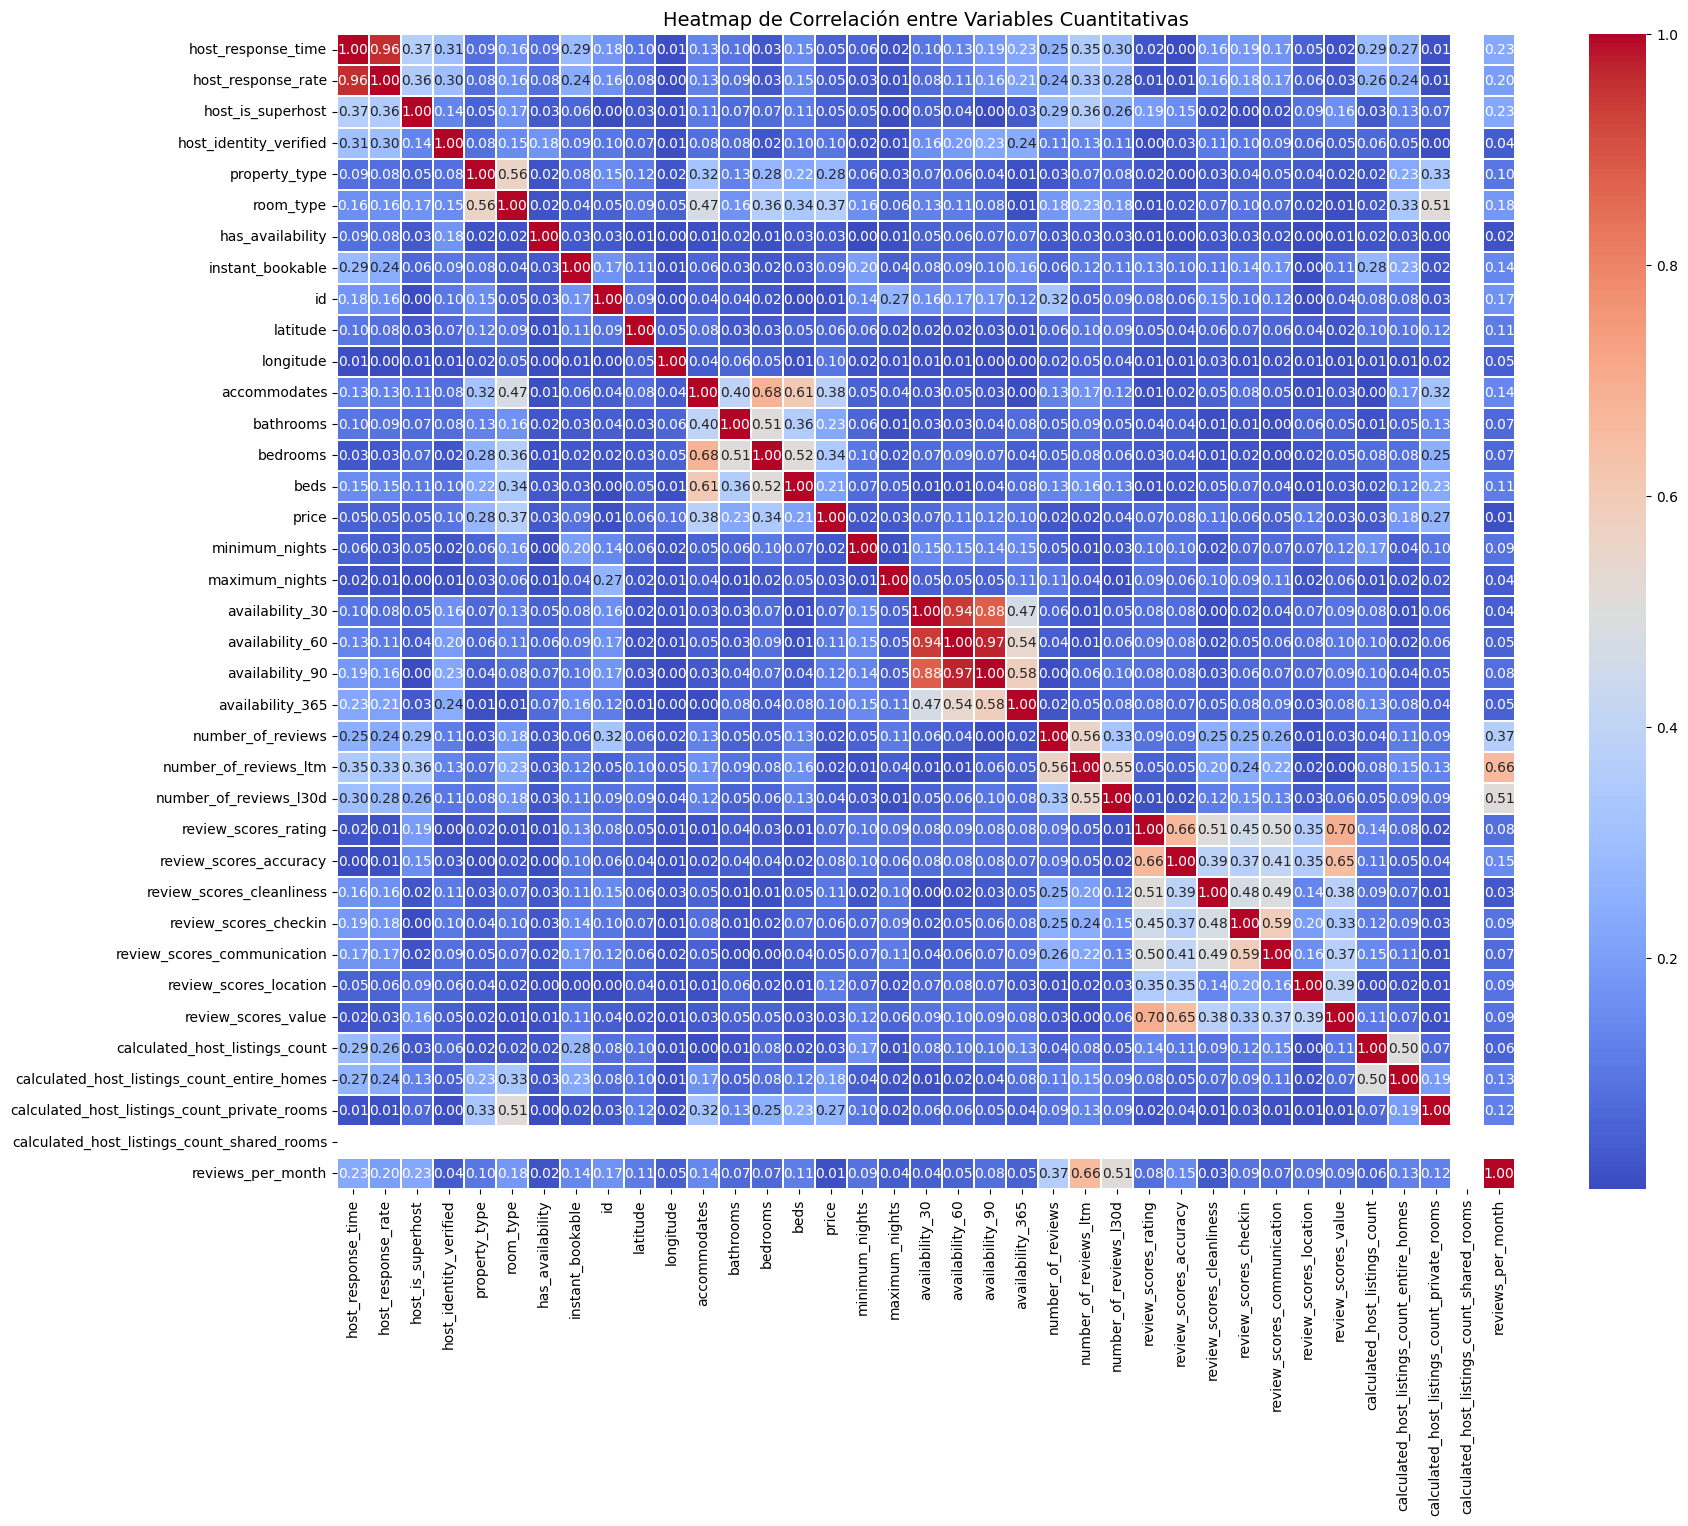

In [679]:
df1_numeric = f1.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df1_numeric.corr()
corr_matrix2= abs(corr_matrix)

# Crear el heatmap
plt.figure(figsize=(19, 15))  # Ajusta el tamaño
sns.heatmap(corr_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.10)

# Configurar el título
plt.title("Heatmap de Correlación entre Variables Cuantitativas", fontsize=14)

# Mostrar la gráfica
plt.show()

In [680]:
#verificar los valores sin repetirse de una columna 
unico = np.unique(df['room_type'])
unico
conteo = df["room_type"].value_counts()  # Cuenta por categoría
conteo

room_type
Entire home/apt    17363
Private room        8693
Shared room          401
Hotel room           125
Name: count, dtype: int64

In [681]:
unico = np.unique(df['property_type'])
unico

array(['Boat', 'Campsite', 'Casa particular', 'Castle', 'Dome',
       'Earthen home', 'Entire bungalow', 'Entire cabin', 'Entire chalet',
       'Entire condo', 'Entire cottage', 'Entire guest suite',
       'Entire guesthouse', 'Entire home', 'Entire home/apt',
       'Entire hostel', 'Entire in-law', 'Entire loft', 'Entire place',
       'Entire rental unit', 'Entire serviced apartment',
       'Entire townhouse', 'Entire vacation home', 'Entire villa',
       'Farm stay', 'Holiday park', 'Hut', 'Private room',
       'Private room in barn', 'Private room in bed and breakfast',
       'Private room in bungalow', 'Private room in cabin',
       'Private room in casa particular', 'Private room in castle',
       'Private room in chalet', 'Private room in condo',
       'Private room in cottage', 'Private room in dome',
       'Private room in dorm', 'Private room in earthen home',
       'Private room in farm stay', 'Private room in floor',
       'Private room in guest suite', 'Priva

In [682]:
#Convertimos la variable dependiente a dicotómica
df['room_type']= df['room_type'].replace(["Hotel room", "Shared room", "Private room"], "No Entire")

#convertimos host_response_time en dicotómica 
df['host_response_time']=df['host_response_time'].replace(["within an hour", "within a few hours", "within a day"], "Rapida")
df['host_response_time']=df['host_response_time'].replace(["a few days or more", "Desconocido"], "No rapida")

# Para convertir property_type. Listas de palabras clave para clasificar
entire_place_keywords = [
    'Entire', 'Boat', 'Campsite', 'Castle', 'Dome', 
    'Earthen home', 'Farm stay', 'Holiday park', 
    'Hut', 'Tiny home', 'Tower', 'Shipping container', 'Tent'
]
# Aquí asumimos que el resto se clasifica como "Room"

# Función para asignar una única categoría
def categorize_property(property_type):
    # Si se encuentra alguna palabra clave en entire_place_keywords, se clasifica como 'Entire Place'
    if any(keyword in property_type for keyword in entire_place_keywords):
        return 'Entire Place'
    # Si no, se asigna 'No Entire'
    else:
        return 'No Entire'

# Aplicar la función a la columna property_type para crear una nueva columna
df['property_type'] = df['property_type'].apply(categorize_property)

# Convertir la columna 'host_response_rate' a dicotómica 
# Función para limpiar y convertir los valores
def clean_and_convert(value):
    if value == '-' or value is None:  # Tratamos -% como valor bajo 
        return -1 
    try:
        return float(value.replace('%', '')) 
    except ValueError:
        return None  

df['host_response_rate_num'] = df['host_response_rate'].apply(clean_and_convert)
def categorize_response_rate(value):
    if value < 50:  
        return 'Respuesta baja'
    else:  
        return 'Respuesta alta'
df['host_response_rate'] = df['host_response_rate_num'].apply(categorize_response_rate)

#minimum nights
def categorize_minimum_nights(value):
    if value < 2:
        return 'Bajo'
    else:
        return 'Alto'

df['minimum_nights'] = df['minimum_nights'].apply(categorize_minimum_nights)

#maximum nights
def categorize_maximum_nights(value):
    if value < 201:
        return 'Bajo'
    else:
        return 'Alto'

df['maximum_nights'] = df['maximum_nights'].apply(categorize_maximum_nights)


df

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate_num
0,https://www.airbnb.com/rooms/35797,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,Dici,2010-06-28,No rapida,Respuesta baja,f,...,5.00,5.00,4.80,4.70,1.0,1.0,0.0,0.0,1.70,0.0
1,https://www.airbnb.com/rooms/44616,Condesa Haus,A new concept of hosting in mexico through a b...,No se proporcionan detalles,https://a0.muscache.com/pictures/251410/ec75fe...,Fernando,2010-08-09,Rapida,Respuesta alta,t,...,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41,100.0
2,https://www.airbnb.com/rooms/67703,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",No se proporcionan detalles,https://a0.muscache.com/pictures/3281720/6f078...,Nicholas,2011-01-04,Rapida,Respuesta alta,t,...,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31,71.0
3,https://www.airbnb.com/rooms/70644,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,Trisha,2010-08-24,Rapida,Respuesta alta,t,...,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83,100.0
4,https://www.airbnb.com/rooms/107078,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,Andrea,2011-04-27,Rapida,Respuesta alta,t,...,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,https://www.airbnb.com/rooms/1252141718111439700,Charming 2-Bedroom Retreat in Lomas de Bezares,Experience Mexico City in this delightful retr...,"Welcome to Lomas de Bezares, a neighborhood kn...",https://a0.muscache.com/pictures/prohost-api/H...,HostPal,2016-04-16,Rapida,Respuesta alta,t,...,5.00,5.00,4.80,4.70,4.9,14.0,0.7,0.0,1.70,100.0
26578,https://www.airbnb.com/rooms/1252159821531694005,Suite King | District Polanco,This spacious room features a plush king-size ...,No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Luis Angel,2024-08-13,Rapida,Respuesta alta,f,...,5.00,5.00,4.80,4.70,16.0,8.0,0.7,0.0,1.70,100.0
26579,https://www.airbnb.com/rooms/1252185591721328995,Suite King | District Polanco,Discover the essence of luxury in our king-siz...,No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Luis Angel,2024-08-13,Rapida,Respuesta alta,f,...,5.00,5.00,4.80,4.70,16.0,8.0,0.7,0.0,1.70,100.0
26580,https://www.airbnb.com/rooms/1252218347521498445,Suite Queen | District Polanco,Welcome to your refuge in the heart of Polanco...,No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Luis Angel,2024-08-13,Rapida,Respuesta alta,f,...,5.00,5.00,4.80,4.70,16.0,8.0,0.7,0.0,1.70,100.0


In [683]:
unico = np.unique(df['property_type'])
unico

array(['Entire Place', 'No Entire'], dtype=object)

In [684]:
unico = np.unique(df['host_response_rate'])
unico

array(['Respuesta alta', 'Respuesta baja'], dtype=object)

In [685]:
unico = np.unique(df['minimum_nights'])
unico

array(['Alto', 'Bajo'], dtype=object)

In [686]:
unico = np.unique(df['maximum_nights'])
unico

array(['Alto', 'Bajo'], dtype=object)

**Lineal**

In [687]:
#definimos variables independientes
Vars_Indep1 = df[['number_of_reviews', 'number_of_reviews_ltm']]
Vars_Indep2 = df[['availability_365', 'availability_90', 'availability_60']]
Vars_Indep3 = df[['availability_365', 'number_of_reviews_ltm']]
Vars_Indep4 = df[['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes']]
Vars_Indep5 = df[['calculated_host_listings_count_private_rooms', 'accommodates']]
Vars_Indep6 = df[['accommodates', 'price', 'bedrooms']]
Vars_Indep7 = df[['review_scores_value', 'availability_30']]
Vars_Indep8 = df[['accommodates', 'price', 'bedrooms']]
Vars_Indep9 = df[['number_of_reviews_ltm' ,'calculated_host_listings_count', 'reviews_per_month']]
Vars_Indep10 = df[['number_of_reviews', 'availability_365']]

In [688]:
#Definimos variables dependientes 
#Dicotómicas por naturaleza 
Var_Dep1 = df['host_is_superhost']
Var_Dep2 = df['host_identity_verified']
Var_Dep3 = df['has_availability']
Var_Dep4 = df['instant_bookable']
#Convertidas a dicotómicas 
Var_Dep5 = df['room_type']
Var_Dep6 = df['host_response_time']
Var_Dep7 = df['minimum_nights']
Var_Dep8 = df['property_type']
Var_Dep9 = df['host_response_rate']
Var_Dep10 = df['maximum_nights']

In [689]:
#Redefinimos las variables 
X1= Vars_Indep1
y1= Var_Dep1

X2= Vars_Indep2
y2= Var_Dep2

X3= Vars_Indep3
y3= Var_Dep3

X4= Vars_Indep4
y4= Var_Dep4

X5= Vars_Indep5
y5= Var_Dep5

X6= Vars_Indep6
y6= Var_Dep6

X7= Vars_Indep7
y7= Var_Dep7

X8= Vars_Indep8
y8= Var_Dep8

X9= Vars_Indep9
y9= Var_Dep9

X10 = Vars_Indep10
y10 = Var_Dep10


In [690]:
#Dividimos el conjutno de datos en la parte de entrenamiento y prueba: 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=None)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=None)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=None)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=None)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=None)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3, random_state=None)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3, random_state=None)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.3, random_state=None)
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.3, random_state=None)
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.3, random_state=None)

In [691]:
#Se escalan todos los datos 
escalar1 = StandardScaler()
escalar2 = StandardScaler()
escalar3 = StandardScaler()
escalar4 = StandardScaler()
escalar5 = StandardScaler()
escalar6 = StandardScaler()
escalar7 = StandardScaler()
escalar8 = StandardScaler()
escalar9 = StandardScaler()
escalar10 = StandardScaler()

In [692]:
#Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba utilizaremos: 
X1_train = escalar1.fit_transform(X1_train)
X1_test = escalar1.transform(X1_test)

X2_train = escalar2.fit_transform(X2_train)
X2_test = escalar2.transform(X2_test)

X3_train = escalar3.fit_transform(X3_train)
X3_test = escalar3.transform(X3_test)

X4_train = escalar4.fit_transform(X4_train)
X4_test = escalar4.transform(X4_test)

X5_train = escalar5.fit_transform(X5_train)
X5_test = escalar5.transform(X5_test)

X6_train = escalar6.fit_transform(X6_train)
X6_test = escalar6.transform(X6_test)

X7_train = escalar7.fit_transform(X7_train)
X7_test = escalar7.transform(X7_test)

X8_train = escalar8.fit_transform(X8_train)
X8_test = escalar8.transform(X8_test)

X9_train = escalar9.fit_transform(X9_train)
X9_test = escalar9.transform(X9_test)

X8_train = escalar10.fit_transform(X10_train)
X8_test = escalar10.transform(X10_test)

In [693]:
#Definimos el algoritmo a utilizar 
from sklearn.linear_model import LogisticRegression
algoritmo1 = LogisticRegression()
algoritmo2 = LogisticRegression()
algoritmo3 = LogisticRegression()
algoritmo4 = LogisticRegression()
algoritmo5 = LogisticRegression()
algoritmo6 = LogisticRegression()
algoritmo7 = LogisticRegression()
algoritmo8 = LogisticRegression()
algoritmo9 = LogisticRegression()
algoritmo10 = LogisticRegression()

In [694]:
#entrenamos el modelo 
algoritmo1.fit(X1_train, y1_train)
algoritmo2.fit(X2_train, y2_train)
algoritmo3.fit(X3_train, y3_train)
algoritmo4.fit(X4_train, y4_train)
algoritmo5.fit(X5_train, y5_train)
algoritmo6.fit(X6_train, y6_train)
algoritmo7.fit(X7_train, y7_train)
algoritmo8.fit(X8_train, y8_train)
algoritmo9.fit(X9_train, y9_train)
algoritmo10.fit(X10_train, y10_train)

LogisticRegression()

**host_is_superhost**

In [695]:
#Realizamos una predicción 
y1_pred = algoritmo1.predict(X1_test)
y1_pred

array(['f', 't', 't', ..., 'f', 'f', 'f'], shape=(7975,), dtype=object)

In [696]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz1 = confusion_matrix(y1_test, y1_pred)
print('Matriz de Confusión: ')
print (matriz1)

Matriz de Confusión: 
[[4174  729]
 [1767 1305]]


In [697]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision1 = precision_score(y1_test, y1_pred, average="binary", pos_label="t")
print('Precision del modelo:')
print(precision1)

Precision del modelo:
0.6415929203539823


In [698]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud1 = accuracy_score(y1_test, y1_pred)
print('Exactitud del modelo:')
print(exactitud1)

Exactitud del modelo:
0.6870219435736677


In [699]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad1 = recall_score(y1_test, y1_pred, average="binary", pos_label="f")
print('Sensibilidad del modelo:')
print(sensibilidad1)

Sensibilidad del modelo:
0.8513155211095248


**host_identity_verified**

In [700]:
#Realizamos una predicción 
y2_pred = algoritmo2.predict(X2_test)
y2_pred

array(['t', 't', 't', ..., 't', 't', 't'], shape=(7975,), dtype=object)

In [701]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz2 = confusion_matrix(y2_test, y2_pred)
print('Matriz de Confusión: ')
print (matriz2)

Matriz de Confusión: 
[[   0  352]
 [   0 7623]]


In [702]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision2 = precision_score(y2_test, y2_pred, average="binary", pos_label="t")
print('Precision del modelo:')
print(precision2)

Precision del modelo:
0.9558620689655173


In [703]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud2 = accuracy_score(y2_test, y2_pred)
print('Exactitud del modelo:')
print(exactitud2)

Exactitud del modelo:
0.9558620689655173


In [704]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad2 = recall_score(y2_test, y2_pred, average="binary", pos_label="f")
print('Sensibilidad del modelo:')
print(sensibilidad2)

Sensibilidad del modelo:
0.0


**has_availability**

In [705]:
#Realizamos una predicción 
y3_pred = algoritmo3.predict(X3_test)
y3_pred

array(['t', 't', 't', ..., 't', 't', 't'], shape=(7975,), dtype=object)

In [706]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz3 = confusion_matrix(y3_test, y3_pred)
print('Matriz de Confusión: ')
print (matriz3)

Matriz de Confusión: 
[[   0   13]
 [   0 7962]]


In [707]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision3 = precision_score(y3_test, y3_pred, average="binary", pos_label="t")
print('Precision del modelo:')
print(precision3)

Precision del modelo:
0.9983699059561129


In [708]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud3 = accuracy_score(y3_test, y3_pred)
print('Exactitud del modelo:')
print(exactitud3)

Exactitud del modelo:
0.9983699059561129


In [709]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad3 = recall_score(y3_test, y3_pred, average="binary", pos_label="f")
print('Sensibilidad del modelo:')
print(sensibilidad3)

Sensibilidad del modelo:
0.0


**instant_bookable**

In [710]:
#Realizamos una predicción 
y4_pred = algoritmo4.predict(X4_test)
y4_pred

array(['f', 't', 'f', ..., 'f', 'f', 'f'], shape=(7975,), dtype=object)

In [711]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz4 = confusion_matrix(y4_test, y4_pred)
print('Matriz de Confusión: ')
print (matriz4)

Matriz de Confusión: 
[[4270  559]
 [2349  797]]


In [712]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision4 = precision_score(y4_test, y4_pred, average="binary", pos_label="t")
print('Precision del modelo:')
print(precision1)

Precision del modelo:
0.6415929203539823


In [713]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud4 = accuracy_score(y4_test, y4_pred)
print('Exactitud del modelo:')
print(exactitud4)

Exactitud del modelo:
0.6353605015673981


In [714]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad4 = recall_score(y4_test, y4_pred, average="binary", pos_label="f")
print('Sensibilidad del modelo:')
print(sensibilidad4)

Sensibilidad del modelo:
0.8842410436943466


**room_type**

In [715]:
#Realizamos una predicción 
y5_pred = algoritmo5.predict(X5_test)
y5_pred

array(['Entire home/apt', 'Entire home/apt', 'Entire home/apt', ...,
       'Entire home/apt', 'No Entire', 'No Entire'],
      shape=(7975,), dtype=object)

In [716]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz5 = confusion_matrix(y5_test, y5_pred)
print('Matriz de Confusión: ')
print (matriz5)

Matriz de Confusión: 
[[4883  351]
 [ 729 2012]]


In [717]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision5 = precision_score(y5_test, y5_pred, average="binary", pos_label="Entire home/apt")
print('Precision del modelo:')
print(precision5)

Precision del modelo:
0.8700997861724875


In [718]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud5 = accuracy_score(y5_test, y5_pred)
print('Exactitud del modelo:')
print(exactitud5)

Exactitud del modelo:
0.864576802507837


In [719]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad5 = recall_score(y5_test, y5_pred, average="binary", pos_label="No Entire")
print('Sensibilidad del modelo:')
print(sensibilidad5)

Sensibilidad del modelo:
0.7340386720175118


**host_response_time**

In [720]:
#Realizamos una predicción 
y6_pred = algoritmo6.predict(X6_test)
y6_pred

array(['Rapida', 'Rapida', 'Rapida', ..., 'Rapida', 'Rapida', 'Rapida'],
      shape=(7975,), dtype=object)

In [721]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz6 = confusion_matrix(y6_test, y6_pred)
print('Matriz de Confusión: ')
print (matriz6)

Matriz de Confusión: 
[[   2 1450]
 [   0 6523]]


In [722]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision6 = precision_score(y6_test, y6_pred, average="binary", pos_label="Rapida")
print('Precision del modelo:')
print(precision6)

Precision del modelo:
0.8181362097077637


In [723]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud6 = accuracy_score(y6_test, y6_pred)
print('Exactitud del modelo:')
print(exactitud6)

Exactitud del modelo:
0.8181818181818182


In [724]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad6= recall_score(y6_test, y6_pred, average="binary", pos_label="No rapida")
print('Sensibilidad del modelo:')
print(sensibilidad6)

Sensibilidad del modelo:
0.0013774104683195593


**mimimun_nights**

In [725]:
#Realizamos una predicción 
y7_pred = algoritmo7.predict(X7_test)
y7_pred

array(['Bajo', 'Bajo', 'Bajo', ..., 'Bajo', 'Bajo', 'Bajo'],
      shape=(7975,), dtype=object)

In [726]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz7 = confusion_matrix(y7_test, y7_pred)
print('Matriz de Confusión: ')
print (matriz7)

Matriz de Confusión: 
[[ 306 2884]
 [ 368 4417]]


In [727]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision7 = precision_score(y7_test, y7_pred, average="binary", pos_label="Alto")
print('Precision del modelo:')
print(precision7)

Precision del modelo:
0.4540059347181009


In [728]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud7 = accuracy_score(y7_test, y7_pred)
print('Exactitud del modelo:')
print(exactitud7)

Exactitud del modelo:
0.5922257053291536


In [729]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad7= recall_score(y7_test, y7_pred, average="binary", pos_label="Bajo")
print('Sensibilidad del modelo:')
print(sensibilidad7)

Sensibilidad del modelo:
0.9230929989550679


**property_type**

In [730]:
#Realizamos una predicción 
y8_pred = algoritmo8.predict(X8_test)
y8_pred

array(['Entire Place', 'Entire Place', 'Entire Place', ...,
       'Entire Place', 'Entire Place', 'Entire Place'],
      shape=(7975,), dtype=object)

In [731]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz8 = confusion_matrix(y8_test, y8_pred)
print('Matriz de Confusión: ')
print (matriz8)

Matriz de Confusión: 
[[5224    0]
 [2751    0]]


In [732]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision8 = precision_score(y8_test, y8_pred, average="binary", pos_label="Entire Place")
print('Precision del modelo:')
print(precision8)

Precision del modelo:
0.6550470219435737


In [733]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud8 = accuracy_score(y8_test, y8_pred)
print('Exactitud del modelo:')
print(exactitud8)

Exactitud del modelo:
0.6550470219435737


In [734]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad8= recall_score(y8_test, y8_pred, average="binary", pos_label="No Entire")
print('Sensibilidad del modelo:')
print(sensibilidad8)

Sensibilidad del modelo:
0.0


**host_response_rate**

In [735]:
#Realizamos una predicción 
y9_pred = algoritmo9.predict(X9_test)
y9_pred

array(['Respuesta alta', 'Respuesta alta', 'Respuesta alta', ...,
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta'],
      shape=(7975,), dtype=object)

In [736]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz9 = confusion_matrix(y9_test, y9_pred)
print('Matriz de Confusión: ')
print (matriz9)

Matriz de Confusión: 
[[7656    0]
 [ 319    0]]


In [737]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision9 = precision_score(y9_test, y9_pred, average="binary", pos_label="Respuesta alta")
print('Precision del modelo:')
print(precision9)

Precision del modelo:
0.96


In [738]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud9 = accuracy_score(y9_test, y9_pred)
print('Exactitud del modelo:')
print(exactitud9)

Exactitud del modelo:
0.96


In [739]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad9= recall_score(y9_test, y9_pred, average="binary", pos_label="Respuesta baja")
print('Sensibilidad del modelo:')
print(sensibilidad9)

Sensibilidad del modelo:
0.0


**maximum_nights**

In [740]:
#Realizamos una predicción 
y10_pred = algoritmo10.predict(X10_test)
y10_pred

array(['Alto', 'Alto', 'Alto', ..., 'Alto', 'Alto', 'Alto'],
      shape=(7975,), dtype=object)

In [741]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz10 = confusion_matrix(y10_test, y10_pred)
print('Matriz de Confusión: ')
print (matriz10)

Matriz de Confusión: 
[[5895   39]
 [2024   17]]


In [742]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision10 = precision_score(y10_test, y10_pred, average="binary", pos_label="Alto")
print('Precision del modelo:')
print(precision10)

Precision del modelo:
0.7444121732541987


In [743]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud10 = accuracy_score(y10_test, y10_pred)
print('Exactitud del modelo:')
print(exactitud10)

Exactitud del modelo:
0.7413166144200627


In [744]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad10= recall_score(y10_test, y10_pred, average="binary", pos_label="Bajo")
print('Sensibilidad del modelo:')
print(sensibilidad10)

Sensibilidad del modelo:
0.008329250367466928
